<a href="https://colab.research.google.com/github/kathdevx/emotionalAI/blob/main/fine_tune_distilroberta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install transformers
!pip install datasets

     |████████████████████████████████| 3.5 MB 14.0 MB/s 
     |████████████████████████████████| 596 kB 51.3 MB/s 
     |████████████████████████████████| 67 kB 4.8 MB/s 
     |████████████████████████████████| 6.8 MB 24.1 MB/s 
     |████████████████████████████████| 895 kB 47.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 311 kB 13.2 MB/s 
     |████████████████████████████████| 212 kB 54.2 MB/s 
     |████████████████████████████████| 134 kB 58.9 MB/s 
     |████████████████████████████████| 1.1 MB 43.3 MB/s 
     |████████████████████████████████| 271 kB 61.9 MB/s 
     |████████████████████████████████| 144 kB 57.2 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 


In [ ]:
import matplotlib.pyplot as plt

from datasets import Dataset

from sklearn.metrics import precision_recall_fscore_support
from datasets import load_dataset
import glob
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/Data'
train_dir = f'{path}/training sentences/*'

total_files = {
    'audio_file_name':[],
    'sentence': []
}
for fname in glob.glob(train_dir):
  with open(fname, 'r') as infile:
    lines = infile.read().splitlines()

    for i,line in enumerate(lines):
      lines[i] = line.replace('.wav', '')
      fname, sentence = lines[i].split(' ',1)
      total_files['audio_file_name'].append(fname)
      total_files['sentence'].append(sentence)
sent_df = pd.DataFrame.from_dict(total_files)

In [ ]:
path = '/content/drive/MyDrive/Data'


fnames = ['Train_even_dataset', 'Validation_even_dataset', 'Test1', 'Test2']
dirnames = ['training sentences', 'validation sentences']

# split_df = None

for i, split in enumerate(['Train']):

  split_csv = pd.read_csv(f'{path}/{fnames[i]}.csv')
  split_csv['FileName'] = split_csv['FileName'].str.replace('.wav', '')
  # split_csv['Path'] = split_csv['Path'].str.replace('/content/drive/MyDrive/Data/Audio Files', 'Podcast Data/Audios')

  split_df = pd.DataFrame(columns=['FileName', 'EmoClass', 'Sentence'])
  split_df['FileName'] = split_csv['FileName']
  split_df['EmoClass'] = split_csv['EmoClass']
#   split_df['Path'] = split_csv['Path']

  split_dir = f'{path}/{dirnames[i]}/*'

  total_files = {
    'FileName':[],
    'Sentence': []
  }
  for fname in glob.glob(split_dir):
    with open(fname, 'r') as infile:
      lines = infile.read().splitlines()

      for i,line in enumerate(lines):
        lines[i] = line.replace('.wav', '')
        fname, sentence = lines[i].split(' ',1)
        total_files['FileName'].append(fname)
        total_files['Sentence'].append(sentence)
  sent_df = pd.DataFrame.from_dict(total_files)
 
  for i in sent_df.index:
      split_df.loc[split_df['FileName'] == sent_df.loc[i, 'FileName'], 'Sentence'] = sent_df.loc[i, 'Sentence']

  # missing = split_df[split_df['Sentence'].isnull()]
  # missing.to_csv(f'{path}/{split}_missing_sentences.csv', index=False)
  split_df = split_df[~split_df['Sentence'].isnull()]
  split_df = split_df.drop_duplicates(subset=['FileName'])
#   split_df.to_csv(f'{path}/{split}_sentences.csv', index=False)
  print(f'Final {split} Dataset size: {len(split_df)}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


Final Train Dataset size: 10141


In [ ]:
data_files = {
    "train": pd.read_csv("/content/drive/MyDrive/Data/Train_sentences.csv"),
    "validation": pd.read_csv("/content/drive/MyDrive/Data/Validation_sentences.csv"),
}


train_dataset = Dataset.from_pandas(split_df)
eval_dataset = Dataset.from_pandas(data_files['validation'])
# dataset = load_dataset("csv", data_files=data_files, delimiter=",", )
# train_dataset = dataset["train"]
# eval_dataset = dataset["validation"]


In [ ]:
split_df.head()

,FileName,EmoClass,Sentence
0,MSP-PODCAST_0627_0047,A,Basically there is a certain group of people w...
1,MSP-PODCAST_2104_2392,A,O ya i mean the guise is selfish prick there's...
2,MSP-PODCAST_1495_0604_0006,A,O k i don't know why this good somebody's call...
3,MSP-PODCAST_0853_0113_0003,A,I think the compila hates women that is from j...
4,MSP-PODCAST_1369_0002_0117,A,Culture here and it isn't only what people rea...


In [ ]:
data_files['train'].head()

,FileName,EmoClass,Sentence,Path
0,MSP-PODCAST_0401_0624,A,So it is just nothing to do with the eleent at...,/content/drive/MyDrive/Data/Audio Files/MSP-PO...
1,MSP-PODCAST_1129_0016,A,Erte befor vugai is the same thing we have gos...,/content/drive/MyDrive/Data/Audio Files/MSP-PO...
2,MSP-PODCAST_0645_0497,A,Nd said what are all these people doing from o...,/content/drive/MyDrive/Data/Audio Files/MSP-PO...
3,MSP-PODCAST_0153_0142,A,Do as i do typeshit whatever and heh jas won o...,/content/drive/MyDrive/Data/Audio Files/MSP-PO...
4,MSP-PODCAST_2277_0291,A,Second of all it's a futting shoe third of all,/content/drive/MyDrive/Data/Audio Files/MSP-PO...


In [ ]:
idx=15
print(f"{train_dataset[idx]['EmoClass']} - {train_dataset[idx]['Sentence']}")

A - So what is like fleece is not even a black name so as it races against as it races against 


In [ ]:
from transformers import DistilBertTokenizerFast

# Instantiate DistilBERT tokenizer...we use the Fast version to optimize runtime
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
from transformers import (AutoTokenizer, 
                          AutoModelForSequenceClassification, 
                          Trainer, 
                          TrainingArguments)

input_column = "Sentence"
output_column = "EmoClass"

label_list = train_dataset.unique(output_column)
label_list.sort()  # Let's sort it for determinism
num_labels = len(label_list)


tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
print(f'Total Labels: {num_labels}')

Total Labels: 8


In [ ]:
def label_to_id(label, label_list):
    if len(label_list) > 0:
        return label_list.index(label) if label in label_list else -1

    return label


def preprocess_function(examples):    
    # speech_list = [tokenizer(sentence) for sentence in examples[input_column]]
    result = tokenizer(examples[input_column]) 
    target_list = [label_to_id(label, label_list) for label in examples[output_column]]    

    result["labels"] = list(target_list)

    return result

In [ ]:
train_dataset = train_dataset.map(
    preprocess_function,
    batch_size=50,
    batched=True,
    num_proc=4)

eval_dataset = eval_dataset.map(
    preprocess_function,
    batch_size=50,
    batched=True,
    num_proc=4)

In [ ]:
from transformers import TFDistilBertModel, DistilBertConfig

DISTILBERT_DROPOUT = 0.2
DISTILBERT_ATT_DROPOUT = 0.2
 
# Configure DistilBERT's initialization
config = DistilBertConfig(dropout=DISTILBERT_DROPOUT, 
                          attention_dropout=DISTILBERT_ATT_DROPOUT, 
                          output_hidden_states=True)
                          
# The bare, pre-trained DistilBERT transformer model outputting raw hidden-states 
# and without any specific head on top.
distilBERT = TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)


Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_projector', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("distilroberta-base", num_labels=num_labels)


for layer in distilBERT.layers:
    layer.trainable = False

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.weight'

In [ ]:
from transformers import EvalPrediction
import numpy as np

is_regression = False
def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
    preds = np.squeeze(preds) if is_regression else np.argmax(preds, axis=1)

    return {"accuracy": (preds == p.label_ids).astype(np.float32).mean().item()}

In [ ]:
from transformers import TrainingArguments
from transformers import EarlyStoppingCallback

training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/Data/distilroberta_final',          # output directory
    num_train_epochs=150,              # total number of training epochs
    per_device_train_batch_size=50,
    per_device_eval_batch_size=50,
    gradient_accumulation_steps=50,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=1e-2,
    save_total_limit=2,
    metric_for_best_model='accuracy',
    load_best_model_at_end=True,             # strength of weight decay
    logging_dir='/content/drive/MyDrive/Data/distilroberta_final/logs'    
)

from typing import Any, Dict, Union

import torch
from packaging import version
from torch import nn

from transformers import (
    Trainer,
    is_apex_available,
)

if is_apex_available():
    from apex import amp

if version.parse(torch.__version__) >= version.parse("1.6"):
    _is_native_amp_available = True
    from torch.cuda.amp import autocast


class CTCTrainer(Trainer):
    def training_step(self, model: nn.Module, inputs: Dict[str, Union[torch.Tensor, Any]]) -> torch.Tensor:
        """
        Perform a training step on a batch of inputs.

        Subclass and override to inject custom behavior.

        Args:
            model (:obj:`nn.Module`):
                The model to train.
            inputs (:obj:`Dict[str, Union[torch.Tensor, Any]]`):
                The inputs and targets of the model.

                The dictionary will be unpacked before being fed to the model. Most models expect the targets under the
                argument :obj:`labels`. Check your model's documentation for all accepted arguments.

        Return:
            :obj:`torch.Tensor`: The tensor with training loss on this batch.
        """

        model.train()
        inputs = self._prepare_inputs(inputs)

        if self.use_amp:
            with autocast():
                loss = self.compute_loss(model, inputs)
        else:
            loss = self.compute_loss(model, inputs)

        if self.args.gradient_accumulation_steps > 1:
            loss = loss / self.args.gradient_accumulation_steps

        if self.use_amp:
            self.scaler.scale(loss).backward()
        elif self.use_apex:
            with amp.scale_loss(loss, self.optimizer) as scaled_loss:
                scaled_loss.backward()
        elif self.deepspeed:
            self.deepspeed.backward(loss)
        else:
            loss.backward()

        return loss.detach()


trainer = CTCTrainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer
)

# os.environ["WANDB_DISABLED"] = "true"

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
import glob
import os
list_of_files = glob.glob('/content/drive/MyDrive/Data/distilroberta_final/check*')
latest_checkpoint = max(list_of_files, key=os.path.getctime)
# latest_checkpoint = '/content/drive/MyDrive/Data/distilroberta_final/checkpoint-160'
torch.cuda.empty_cache()
trainer.train(latest_checkpoint)

Loading model from /content/drive/MyDrive/Data/distilroberta_final/checkpoint-200).
The following columns in the training set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: __index_level_0__, Sentence, FileName, EmoClass.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 10141
  Num Epochs = 150
  Instantaneous batch size per device = 50
  Total train batch size (w. parallel, distributed & accumulation) = 2500
  Gradient Accumulation steps = 50
  Total optimization steps = 600
  Continuing training from checkpoint, will skip to saved global_step
  Continuing training from epoch 50
  Continuing training from global step 200
  Will 

0it [00:00, ?it/s]

Epoch,Training Loss,Validation Loss,Accuracy
50,No log,2.088213,0.172561
51,No log,2.063124,0.178002
52,No log,2.121216,0.146133
53,No log,2.039367,0.118150
54,No log,2.026334,0.146133
55,No log,2.076096,0.172561
56,No log,2.058923,0.178002
57,No log,2.128791,0.102993
58,No log,2.141316,0.178002
59,No log,2.056037,0.178002


The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: Path, Sentence, FileName, EmoClass.
***** Running Evaluation *****
  Num examples = 2573
  Batch size = 50
Saving model checkpoint to /content/drive/MyDrive/Data/distilroberta_final/checkpoint-204
Configuration saved in /content/drive/MyDrive/Data/distilroberta_final/checkpoint-204/config.json
Model weights saved in /content/drive/MyDrive/Data/distilroberta_final/checkpoint-204/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/Data/distilroberta_final/checkpoint-204/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/Data/distilroberta_final/checkpoint-204/special_tokens_map.json
Deleting older checkpoint [/content/drive/MyDrive/Data/distilroberta_final/checkpoint-200] due to args.save_total_limit
The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequ

Epoch,Training Loss,Validation Loss,Accuracy
50,No log,2.088213,0.172561
51,No log,2.063124,0.178002
52,No log,2.121216,0.146133
53,No log,2.039367,0.118150
54,No log,2.026334,0.146133
55,No log,2.076096,0.172561
56,No log,2.058923,0.178002
57,No log,2.128791,0.102993
58,No log,2.141316,0.178002
59,No log,2.056037,0.178002


The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: Path, Sentence, FileName, EmoClass.
***** Running Evaluation *****
  Num examples = 2573
  Batch size = 50
Saving model checkpoint to /content/drive/MyDrive/Data/distilroberta_final/checkpoint-464
Configuration saved in /content/drive/MyDrive/Data/distilroberta_final/checkpoint-464/config.json
Model weights saved in /content/drive/MyDrive/Data/distilroberta_final/checkpoint-464/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/Data/distilroberta_final/checkpoint-464/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/Data/distilroberta_final/checkpoint-464/special_tokens_map.json
Deleting older checkpoint [/content/drive/MyDrive/Data/distilroberta_final/checkpoint-460] due to args.save_total_limit
The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequ

KeyboardInterrupt: ignored

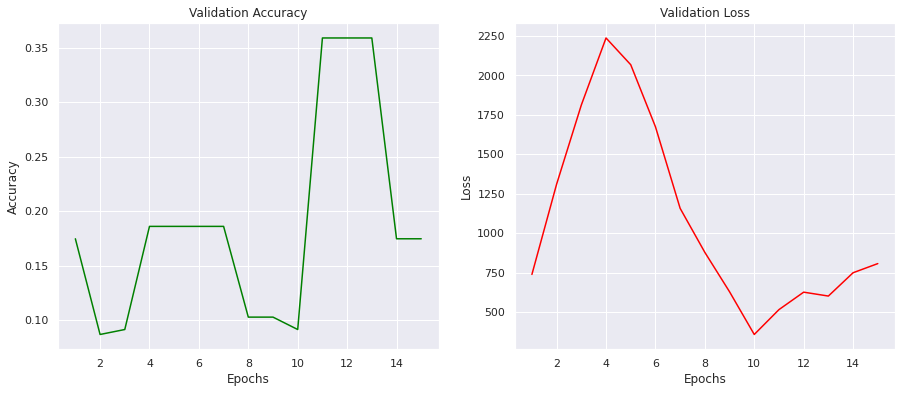

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.palette='tab20'
f, axs = plt.subplots(1,2,figsize=(15,6))

plt.subplot(1, 2, 1)
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
sns.lineplot(color='green', x=range(1,16), y=[0.174567, 0.086600, 0.091158, 
                               0.185962, 0.185962, 0.185962, 
                               0.185962, 0.102552, 0.102552, 
                               0.091158, 0.359161, 0.359161, 
                               0.359161, 0.174567, 0.174567])
plt.subplot(1, 2, 2)
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
sns.lineplot(color='red', x=range(1,16), y=[738.1882, 1310.763, 1812.658, 
                               2237.995, 2068.226, 1674.858, 
                               1157.303, 877.9375, 628.1445, 
                               357.2683, 514.9675, 625.6478, 
                               600.9447, 748.8183, 806.8268])


In [ ]:
import matplotlib.pyplot as plt

from datasets import Dataset

from sklearn.metrics import precision_recall_fscore_support
from datasets import load_dataset
import glob
import pandas as pd

In [ ]:
import pandas as pd
import glob
path = '/content/drive/MyDrive/Data'


fnames = ['Test1', 'Test2']
dirnames = ['test sentences']

# split_df = None

for i, split in enumerate(fnames):

  split_csv = pd.read_csv(f'{path}/{fnames[i]}.csv')
  split_csv['FileName'] = split_csv['FileName'].str.replace('.wav', '')
  split_csv.drop(split_csv.index[split_csv['EmoClass'] == 'X'], inplace = True)
  split_csv.drop(split_csv.index[split_csv['EmoClass'] == 'O'], inplace = True)

  split_csv = split_csv.reset_index()
  # test_set = test_set.groupby('EmoClass', group_keys=False).apply(lambda x: x.sample(frac=0.05)) 
  # test_set = test_set.reset_index()

  split_df = pd.DataFrame(columns=['FileName', 'EmoClass', 'Sentence'])
  split_df['FileName'] = split_csv['FileName']
  split_df['EmoClass'] = split_csv['EmoClass']
  #   split_df['Path'] = split_csv['Path']

  split_dir = f'{path}/{dirnames[0]}/*'

  total_files = {
    'FileName':[],
    'Sentence': []
  }
  for fname in glob.glob(split_dir):
    with open(fname, 'r') as infile:
      lines = infile.read().splitlines()
                          
      for i,line in enumerate(lines):
        lines[i] = line.replace('.wav', '')
        fname, sentence = lines[i].split(' ',1)
        total_files['FileName'].append(fname)
        total_files['Sentence'].append(sentence)
  sent_df = pd.DataFrame.from_dict(total_files)
                                                                                      
  for i in sent_df.index:
    split_df.loc[split_df['FileName'] == sent_df.loc[i, 'FileName'], 'Sentence'] = sent_df.loc[i, 'Sentence']

    # missing = split_df[split_df['Sentence'].isnull()]
    # missing.to_csv(f'{path}/{split}_missing_sentences.csv', index=False)
  split_df = split_df[~split_df['Sentence'].isnull()]
  split_df = split_df.drop_duplicates(subset=['FileName'])
                                                                                                          
  split_df.to_csv(f'{path}/{split}_sentences.csv', index=False)
  print(f'Final {split} Dataset size: {len(split_df)}')
                                                                                                              

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  


Final Test1 Dataset size: 11083
Final Test2 Dataset size: 4045


In [ ]:
model_name_or_path = '/content/drive/MyDrive/Data/final_model_epoch/checkpoint-400'
config = AutoConfig.from_pretrained(model_name_or_path)
processor = Wav2Vec2Processor.from_pretrained('facebook/wav2vec2-base-960h', return_attention_mask=True)
target_sampling_rate = processor.feature_extractor.sampling_rate
model = Wav2Vec2ForSpeechClassification.from_pretrained(model_name_or_path)

In [ ]:
from transformers import TFDistilBertModel, DistilBertConfig

DISTILBERT_DROPOUT = 0.2
DISTILBERT_ATT_DROPOUT = 0.2
 
# Configure DistilBERT's initialization
config = DistilBertConfig(dropout=DISTILBERT_DROPOUT, 
                          attention_dropout=DISTILBERT_ATT_DROPOUT, 
                          output_hidden_states=True)
                          
# The bare, pre-trained DistilBERT transformer model outputting raw hidden-states 
# and without any specific head on top.
model = TFDistilBertModel.from_pretrained('/content/drive/MyDrive/Data/distilroberta_final/checkpoint-588/', from_pt=True)


You are using a model of type roberta to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['roberta.encoder.layer.2.output.dense.weight', 'roberta.encoder.layer.2.attention.output.dense.bias', 'roberta.encoder.layer.1.attention.output.LayerNorm.bias', 'classifier.dense.bias', 'roberta.embeddings.position_embeddings.weight', 'roberta.encoder.layer.3.intermediate.dense.weight', 'roberta.encoder.layer.1.output.LayerNorm.bias', 'roberta.encoder.layer.5.attention.self.query.weight', 'roberta.encoder.layer.2.attention.output.LayerNorm.weight', 'roberta.encoder.layer.3.attention.output.LayerNorm.bias', 'roberta.encoder.layer.4.attention.self.query.weight', 'roberta.encoder.layer.0.output.dense.weight', 'roberta.encoder.layer.2.attention.output.LayerNorm.bias', 'roberta.encoder.layer.0.attention.self.value.weight', 'roberta.en

In [ ]:
model()

In [ ]:
from transformers import DistilBertTokenizerFast

# Instantiate DistilBERT tokenizer...we use the Fast version to optimize runtime
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased', padding=True,truncation=True)

In [ ]:
from transformers import (AutoTokenizer, 
                          AutoModelForSequenceClassification, 
                          Trainer, 
                          TrainingArguments)


data_files={
    "test1": "/content/drive/MyDrive/Data/Test1_sentences.csv",
    "test2": "/content/drive/MyDrive/Data/Test2_sentences.csv"
    }

dataset = load_dataset("csv", data_files=data_files, delimiter=",",)
test1_dataset = dataset["test1"]
test2_dataset = dataset["test2"]

input_column = "Sentence"
output_column = "EmoClass"

label_list = test1_dataset.unique(output_column)
label_list.sort()  # Let's sort it for determinism
num_labels = len(label_list)


print(f'Total Labels: {num_labels}')

Using custom data configuration default-9f0be04288602d53


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-9f0be04288602d53/0.0.0/6b9057d9e23d9d8a2f05b985917a0da84d70c5dae3d22ddd8a3f22fb01c69d9e. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

Total Labels: 8


In [ ]:
def label_to_id(label, label_list):
    if len(label_list) > 0:
        return label_list.index(label) if label in label_list else -1

    return label


def preprocess_function(examples):    
    result = tokenizer(examples[input_column],return_tensors="pt") 
    target_list = [label_to_id(label, label_list) for label in examples[output_column]]    

    result["labels"] = list(target_list)

    return result

In [ ]:
def predict(examples):
  features = examples
  input_ids = features['input_ids']
  attention_mask = features['attention_mask']

  with torch.no_grad():
    logits = model(input_ids=input_ids, attention_mask=attention_mask).logits 
    print('passed')
    pred_ids = torch.argmax(logits, dim=-1).detach().cpu().numpy()
    examples["predicted"] = pred_ids

  return examples

In [ ]:
test1_dataset[0]

In [ ]:
test1_dataset = test1_dataset.map(
    preprocess_function,
    batch_size=50,
    batched=True,
    num_proc=4)

In [ ]:
test2_dataset = test2_dataset.map(
    preprocess_function,
    num_proc=4)

In [ ]:
from sklearn.metrics import classification_report
import torch

result1 = test2_dataset.map(
    predict,
    num_proc=3
)

label_names = [config.id2label[i] for i in range(config.num_labels)]
y_true = [config.label2id[name] for name in result1[output_column]]
y_pred = result1["predicted"]
print('\n')
print(classification_report(y_true, y_pred, target_names=label_names, zero_division=True))